In [136]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

plt.rcParams['font.size'] = 14.0
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'

In [137]:
# List to store all DataFrames
dfs = []

folder_path = '../results/round_metrics'

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith('.csv'):  # Ensure it's a CSV file
        file_path = os.path.join(folder_path, file)
        # Load the CSV file into a DataFrame and append it to the list
        dfs.append(pd.read_csv(file_path, index_col=0))

In [138]:
df =  pd.concat(dfs, ignore_index=True)

In [139]:
df['accuracy'] = 100 * df['accuracy'].round(4)
df['f1'] = 100 * df['f1'].round(4)
df['matthews_correlation'] = 100 * df['matthews_correlation'].round(4)

In [140]:
df['server_opt_lr_log10'] = np.log10(df['server_opt_lr']).round(1)
df['client_opt_lr_log10'] = np.log10(df['client_opt_lr']).round(1)

In [141]:
df_fedopt = df[~df['fda']]

In [142]:
df_fdaopt = df[df['fda']]

In [143]:
best_performing = {
    ('MRPC', 'FedAdam'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -4},
    ('MRPC', 'FedAvg'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -3},
    ('MRPC', 'FedAvgM'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -3},
    ('MRPC', 'FedAdamW'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -5},
    ('MRPC', 'FedAdagrad'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -5},
    
    ('RTE', 'FedAdam'): {'server_opt_lr_log10': -5, 'client_opt_lr_log10': -5},
    ('RTE', 'FedAvg'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -3},
    ('RTE', 'FedAvgM'): {'server_opt_lr_log10': -1, 'client_opt_lr_log10': -3},
    ('RTE', 'FedAdamW'): {'server_opt_lr_log10': -5, 'client_opt_lr_log10': -5},
    ('RTE', 'FedAdagrad'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -3},
    
    ('CoLa', 'FedAdam'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -5},
    ('CoLa', 'FedAvg'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -3},
    ('CoLa', 'FedAvgM'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -5},
    ('CoLa', 'FedAdamW'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -3},
    ('CoLa', 'FedAdagrad'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -5},
    
    ('SST-2', 'FedAdam'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -4},
    ('SST-2', 'FedAvg'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -3},
    ('SST-2', 'FedAvgM'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -4},
    ('SST-2', 'FedAdamW'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -4},
    ('SST-2', 'FedAdagrad'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -4},
    
    ('QNLI', 'FedAdam'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -3},
    ('QNLI', 'FedAvg'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -3},
    ('QNLI', 'FedAvgM'): {'server_opt_lr_log10': 0, 'client_opt_lr_log10': -3},
    ('QNLI', 'FedAdamW'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -3},
    ('QNLI', 'FedAdagrad'): {'server_opt_lr_log10': -4, 'client_opt_lr_log10': -3},
}

In [144]:
def filter_unique_test(df, checkpoint, ds_path, ds_name, alpha, batch_size, num_clients, clients_per_round, fda):
    return df[
        (df['checkpoint'] == checkpoint) &
        (df['ds_path'] == ds_path) &
        (df['ds_name'] == ds_name) &
        (df['alpha'] == alpha) &
        (df['batch_size'] == batch_size) &
        (df['num_clients'] == num_clients) &
        (df['clients_per_round'] == clients_per_round) &
        (df['fda'] == fda)
    ]

In [145]:
def filter_opt(df, algo):
    if algo == 'FedAdam':
        return df[
            (df['server_opt_name'] == 'Adam') &
            (df['client_opt_name'] == 'SGD')
        ]
    if algo == 'FedAvg':
        return df[
            (df['server_opt_name'] == 'SGD') &
            (df['client_opt_name'] == 'SGD') &
            (df['server_opt_momentum'].isna())
        ]
    if algo =='FedYogi':
        return df[
            (df['server_opt_name'] == 'Yogi') &
            (df['client_opt_name'] == 'SGD')
        ]
    if algo == 'FedAvgM':
        return df[
            (df['server_opt_name'] == 'SGD') &
            (df['client_opt_name'] == 'SGD') &
            (df['server_opt_momentum'] == 0.9)
        ]
    if algo == 'FedAdagrad':
        return df[
            (df['server_opt_name'] == 'Adagrad') &
            (df['client_opt_name'] == 'SGD')
        ]
    if algo == 'FedAdamW':
        return df[
            (df['server_opt_name'] == 'AdamW') &
            (df['client_opt_name'] == 'SGD')
        ]

In [146]:
def learning_rate_grid_max(df, algo, ds_name, metric):
    
    df_algo = filter_opt(df, algo)
    
    df_algo = df_algo[df_algo['local_epochs'] == 1]
    
    column_metric = metric.lower().replace(' ', '_')
    # Group by the specified columns and use a custom aggregation to find the first max based on smallest 'round'
    df_algo_round = (
        df_algo.sort_values([column_metric, 'round'], ascending=[False, True])  # Sort by accuracy descending, then round ascending
        .groupby(['client_opt_lr_log10', 'server_opt_lr_log10'], as_index=False)
        .first()  # Select the first row in each group
    )
    #print(df_algo_round)
    
    
    # Pivot the DataFrame for easier plotting
    pivot_table = df_algo_round.pivot(index='client_opt_lr_log10', columns='server_opt_lr_log10', values=column_metric)

    # Extract unique learning rates and accuracy values
    client_opt_lr = pivot_table.index.astype(float)
    server_opt_lr = pivot_table.columns.astype(float)
    accuracy = pivot_table.values



    # Compute grid edges (midpoints)
    client_opt_lr_edges = []
    server_opt_lr_edges = []

    for axes_val in client_opt_lr:
        client_opt_lr_edges.append(axes_val - 0.5)
        client_opt_lr_edges.append(axes_val + 0.5)

    for axes_val in server_opt_lr:
        server_opt_lr_edges.append(axes_val - 0.5)
        server_opt_lr_edges.append(axes_val + 0.5)

    client_opt_lr_edges = sorted(list(set(client_opt_lr_edges)))
    server_opt_lr_edges = sorted(list(set(server_opt_lr_edges)))
    
    pdf = PdfPages(f'plots/max_{ds_name}_{algo}.pdf')

    # Create the plot
    plt.figure(figsize=(7.5, 7))
    """ For fdaavg
    plt.figure(figsize=(3.2, 7))
    """
    
    # Add accuracy numbers inside the boxes
    for i in range(len(client_opt_lr)):
        for j in range(len(server_opt_lr)):
            plt.text(
                server_opt_lr[j],  # X-coordinate (server learning rate)
                client_opt_lr[i],  # Y-coordinate (client learning rate)
                f"{accuracy[i, j]:.1f}",  # Format the accuracy to 2 decimal places
                ha='center', va='center', color='black', fontsize=20  # Center the text and use a contrasting color
            )

    # Use pcolormesh with the adjusted edges
    mesh = plt.pcolormesh(
        server_opt_lr_edges,  # Server learning rate edges
        client_opt_lr_edges,  # Client learning rate edges
        accuracy,             # Accuracy values
        cmap='Blues',
        #vmin=30,
        #vmax=90
    )
    
    
    
    """ For fdaavg
    plt.gca().set_aspect(1.2)  # Increase this value to make the plot narrower
    # Reduce whitespace around the plot
    plt.subplots_adjust(left=0.1, right=0.65)
    """
    
    
    


    # Add color bar
    cbar = plt.colorbar(mesh)
    cbar.set_label(metric)

    # Label the axes
    plt.xlabel('Server Learning Rate ($\log_{10}$)')
    plt.ylabel('Client Learning Rate ($\log_{10}$)')
    #plt.title(f'{ds_name}, {algo}')
    plt.title(f'{algo}')
    
    """for fdaavg
    plt.xticks([])
    """
    plt.xticks(server_opt_lr)
    plt.yticks(client_opt_lr)

    # Show the plot
    #plt.show()
    
    pdf.savefig(plt.gcf()) # Save the current figure
    plt.close()
    pdf.close()

In [147]:
def fda_name(fed_opt):
    if fed_opt == 'FedAdam':
        return 'FDA-Adam'
    if fed_opt == 'FedAvg':
        return 'FDA-SGD'
    if fed_opt == 'FedAvgM':
        return 'FDA-SGDM'
    if fed_opt == 'FedAdagrad':
        return 'FDA-Adagrad'
    if fed_opt == 'FedAdamW':
        return 'FDA-AdamW'
    
    if fed_opt == 'FedYogi':
        return 'FDA-Yogi'

In [148]:
def plot_variance(df, log, algo):
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(df['round'], df['variance'], marker='o', linestyle='-', label='Variance')

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.6)

    # Label the axes
    plt.xlabel('Round')
    plt.ylabel('Variance')
    
    if log: plt.yscale('log')

    # Add a title
    plt.title(algo)

    # Add a legend
    plt.legend()

    plt.show()

# MRPC

clients = 10, per round = 10, max rounds = 100

In [149]:
best_accuracy = 90.2

In [150]:
df_fed_opt = filter_unique_test(
    df_fedopt, checkpoint='roberta-base', ds_path='glue', ds_name='mrpc', alpha=1., batch_size=8, num_clients=10, clients_per_round=10, fda=False
)
df_fda_opt = filter_unique_test(
    df_fdaopt, checkpoint='roberta-base', ds_path='glue', ds_name='mrpc', alpha=1., batch_size=8, num_clients=10, clients_per_round=10, fda=True
)

df_fed_opt = df_fed_opt[df_fed_opt['round'] <= 100]
df_fda_opt = df_fda_opt[df_fda_opt['round'] <= 100]

In [151]:
max(df_fed_opt['accuracy'])

90.2

In [37]:
max(df_fda_opt['accuracy'])

89.46

## Best learning rate for FedOpt

In [38]:
#learning_rate_grid(df_mrpc, 'FedAvgM', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAvgM', 'MRPC', 'Accuracy')

In [39]:
#learning_rate_grid(df_mrpc, 'FedAdam', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdam', 'MRPC', 'Accuracy',)

In [40]:
#learning_rate_grid(df_mrpc, 'FedAdamW', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdamW', 'MRPC', 'Accuracy',)

In [41]:
#learning_rate_grid(df_mrpc, 'FedAdagrad', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdagrad', 'MRPC', 'Accuracy',)

In [58]:
#learning_rate_grid(df_mrpc, 'FedAvg', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAvg', 'MRPC', 'Accuracy',)

## Variance

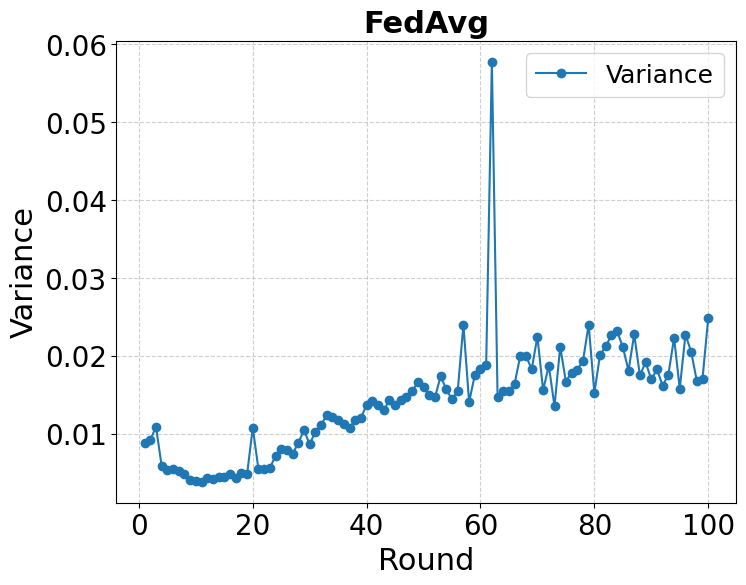

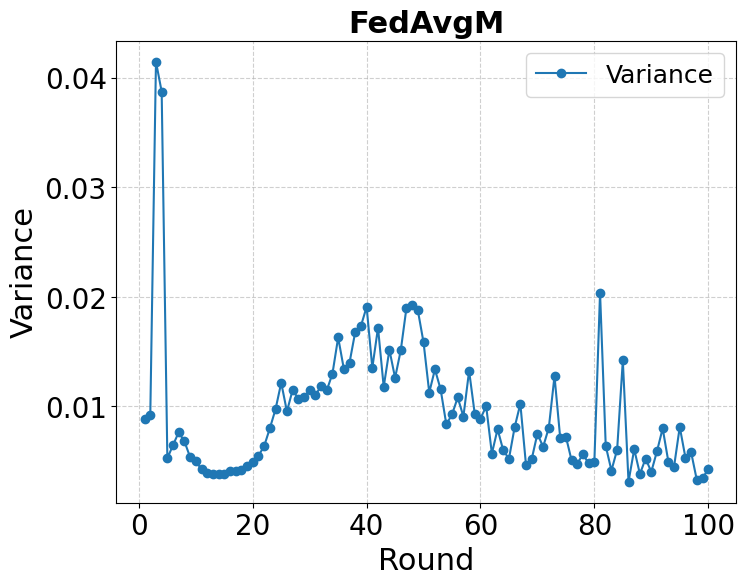

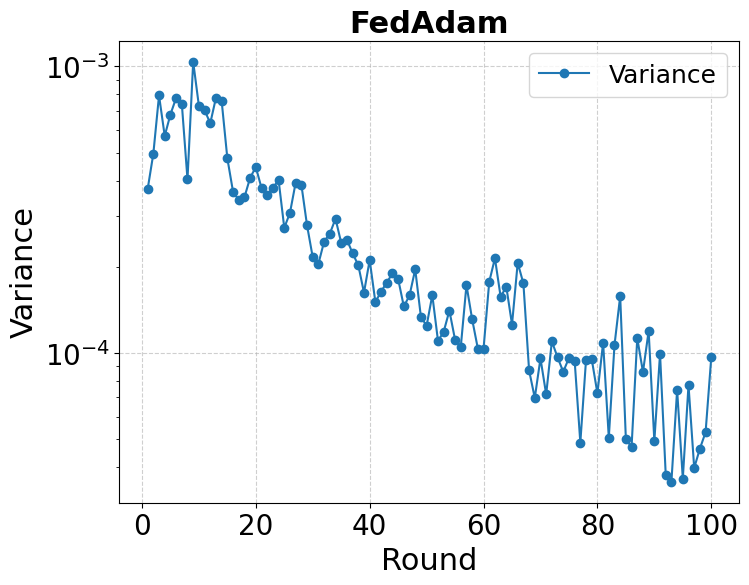

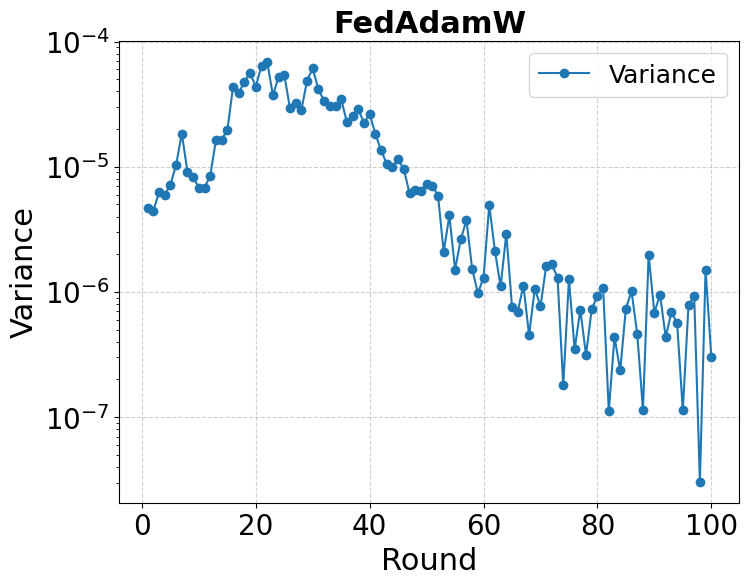

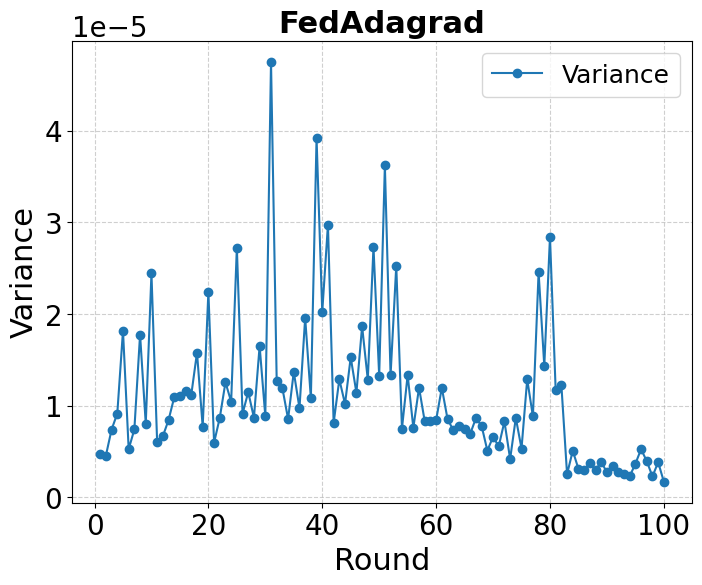

In [24]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:
    
    df_fed_alg = filter_opt(df_fed_opt, alg)
    
    df_fed_alg = df_fed_alg[df_fed_alg['local_epochs'] == 1]
    
    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('MRPC', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('MRPC', alg)]['client_opt_lr_log10'])
    ]
    
    if alg in ['FedAdam', 'FedAdamW']:
        plot_variance(df_fed_alg, True, alg)
    else:
        plot_variance(df_fed_alg, False, alg)

## FDA vs Fed-Opt

In [86]:
percentages = [0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

In [87]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Algorithm", *percentages]

In [88]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:

    df_fed_alg = filter_opt(df_fed_opt, alg)
    df_fda_alg = filter_opt(df_fda_opt, alg)

    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('MRPC', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('MRPC', alg)]['client_opt_lr_log10'])
    ]

    df_fda_alg = df_fda_alg[
        (df_fda_alg['server_opt_lr_log10'] == best_performing[('MRPC', alg)]['server_opt_lr_log10']) & 
        (df_fda_alg['client_opt_lr_log10'] == best_performing[('MRPC', alg)]['client_opt_lr_log10'])
    ]
    
    #print(df_fed_alg['local_epochs'].unique())
    
    #for e in sorted(df_fed_alg['local_epochs'].unique()):
    for e in [1]:
        
        fed_opt_row = [f"{alg} (e = {e})"]
        
        df_e = df_fed_alg[df_fed_alg['local_epochs'] == e]
        
        #print(len(df_fed_alg))
        
        for perc in percentages:
            acc = perc * best_accuracy
            def_fed_alg_best = df_e[df_e['accuracy'] >= acc]
            
            if def_fed_alg_best.empty:
                fed_opt_row.append("-")
            else:
                fed_opt_row.append(def_fed_alg_best.iloc[0]['round'])
            
        table.add_row(fed_opt_row)
        
    fda_opt_row = [fda_name(alg)]
    
    for perc in percentages:
        acc = perc * best_accuracy
                
        def_fda_alg_best = df_fda_alg[df_fda_alg['accuracy'] >= acc]
            
        if def_fda_alg_best.empty:
            fda_opt_row.append("-")
        else:
            fda_opt_row.append(def_fda_alg_best.iloc[0]['round'])
    
    table.add_row(fda_opt_row)
    
    table.add_row((len(percentages) + 1) * ['#'])

In [89]:
table

Algorithm,0.8,0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1
FedAvg (e = 1),17,19,26,26,26,26,30,30,39,47,65,-,-
FDA-SGD,5,5,6,6,6,8,8,10,23,33,-,-,-
#,#,#,#,#,#,#,#,#,#,#,#,#,#
FedAvgM (e = 1),16,17,21,21,24,27,27,31,37,62,68,-,-
FDA-SGDM,4,5,5,8,8,8,8,16,17,18,51,-,-
#,#,#,#,#,#,#,#,#,#,#,#,#,#
FedAdam (e = 1),15,17,20,20,20,20,20,40,54,54,-,-,-
FDA-Adam,4,5,7,7,7,9,9,11,22,22,60,-,-
#,#,#,#,#,#,#,#,#,#,#,#,#,#
FedAdamW (e = 1),15,16,17,17,18,22,22,25,27,27,35,35,42


# RTE

clients = 10, per round = 5, max rounds = 250

In [114]:
best_accuracy = 78.7

In [115]:
df_fed_opt = filter_unique_test(
    df_fedopt, checkpoint='roberta-base', ds_path='glue', ds_name='rte', alpha=1., batch_size=8, num_clients=10, clients_per_round=5, fda=False
)
df_fda_opt = filter_unique_test(
    df_fdaopt, checkpoint='roberta-base', ds_path='glue', ds_name='rte', alpha=1., batch_size=8, num_clients=10, clients_per_round=5, fda=True
)

In [116]:
max(df_fed_opt['accuracy'])

81.23

In [117]:
max(df_fda_opt['accuracy'])

81.23

## Variance

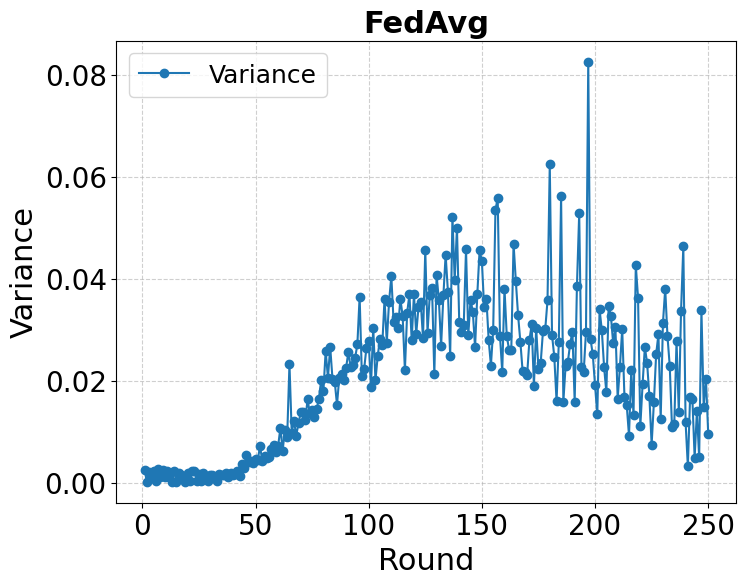

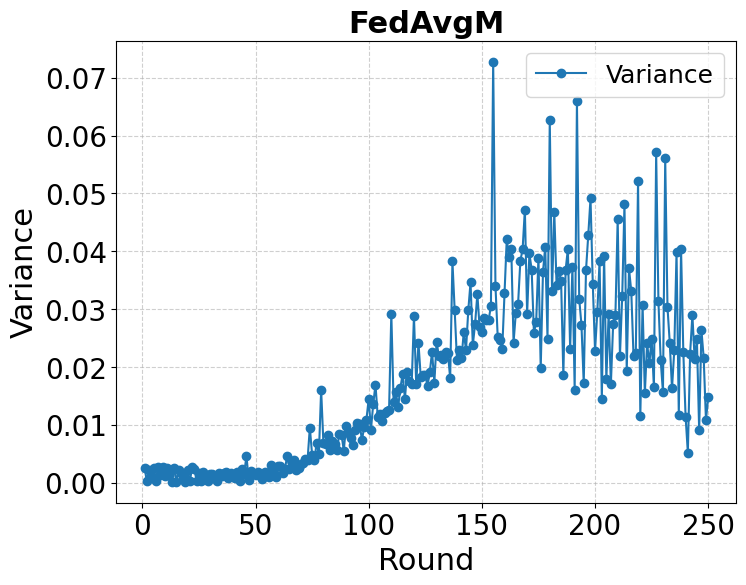

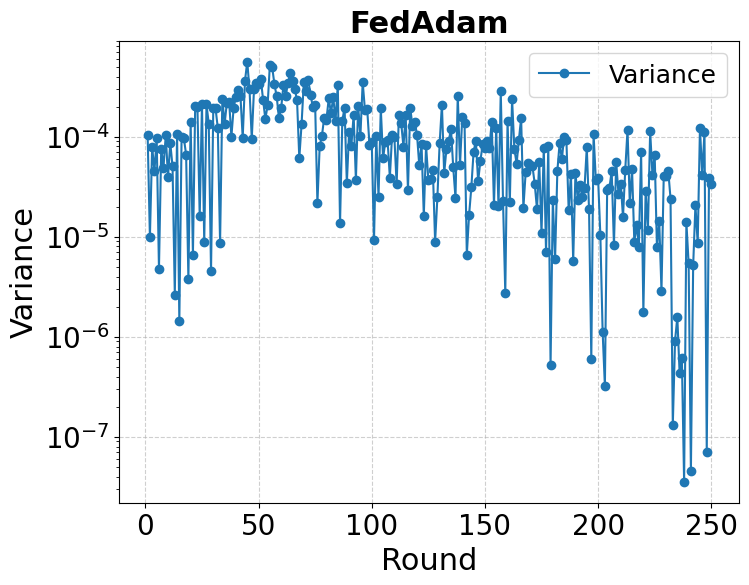

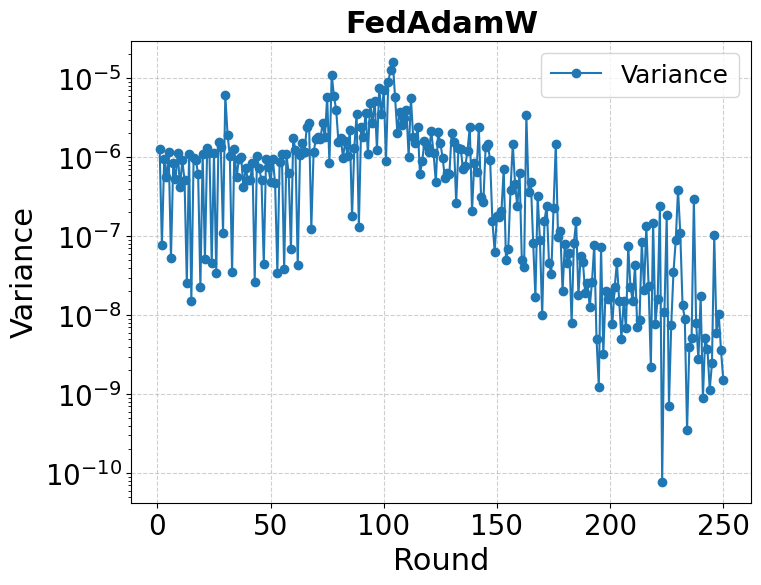

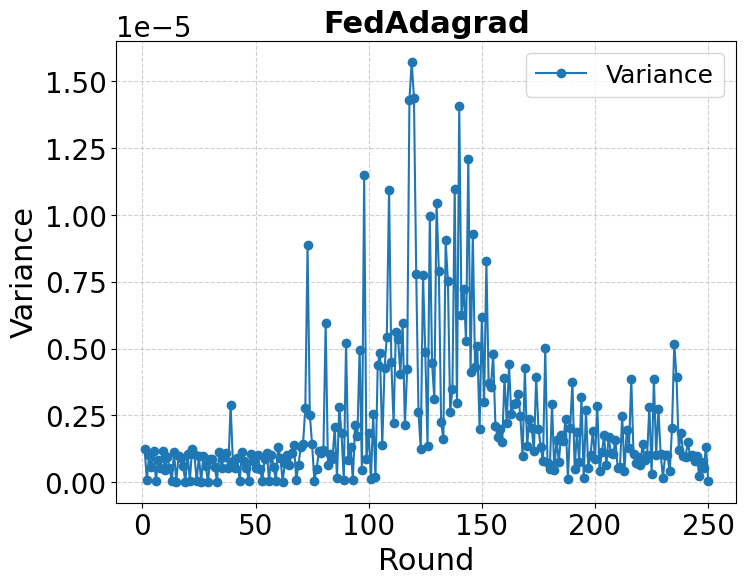

In [48]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:
    
    df_fed_alg = filter_opt(df_fed_opt, alg)
    
    df_fed_alg = df_fed_alg[df_fed_alg['local_epochs'] == 1]
    
    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('MRPC', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('MRPC', alg)]['client_opt_lr_log10'])
    ]
    
    if alg in ['FedAdam', 'FedAdamW']:
        plot_variance(df_fed_alg, True, alg)
    else:
        plot_variance(df_fed_alg, False, alg)

## Best learning rate for FedOpt

In [49]:
#learning_rate_grid(df_mrpc, 'FedAvgM', round_num=100, ds_name='MRPC', server_opt_momentum=0.9)
learning_rate_grid_max(df_fed_opt, 'FedAvgM', 'RTE', 'Accuracy')

In [50]:
#learning_rate_grid(df_mrpc, 'FedAdam', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdam', 'RTE', 'Accuracy',)

In [51]:
#learning_rate_grid(df_mrpc, 'FedAdamW', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdamW', 'RTE', 'Accuracy',)

In [52]:
#learning_rate_grid(df_mrpc, 'FedAdagrad', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdagrad', 'RTE', 'Accuracy',)

In [53]:
#learning_rate_grid(df_mrpc, 'FedAvg', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAvg', 'RTE', 'Accuracy',)

## FDA vs Fed-Opt

In [94]:
percentages = [0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

In [118]:
percentages = [0.85, 0.9, 0.95]

In [119]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Algorithm", *percentages]

In [120]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:

    df_fed_alg = filter_opt(df_fed_opt, alg)
    df_fda_alg = filter_opt(df_fda_opt, alg)

    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('RTE', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('RTE', alg)]['client_opt_lr_log10'])
    ]

    df_fda_alg = df_fda_alg[
        (df_fda_alg['server_opt_lr_log10'] == best_performing[('RTE', alg)]['server_opt_lr_log10']) & 
        (df_fda_alg['client_opt_lr_log10'] == best_performing[('RTE', alg)]['client_opt_lr_log10'])
    ]
    
    #print(df_fed_alg['local_epochs'].unique())
    
    #for e in sorted(df_fed_alg['local_epochs'].unique()):
    for e in [1]:
        
        fed_opt_row = [f"{alg} (e = {e})"]
        
        df_e = df_fed_alg[df_fed_alg['local_epochs'] == e]
        
        #print(len(df_fed_alg))
        
        for perc in percentages:
            acc = perc * best_accuracy
            def_fed_alg_best = df_e[df_e['accuracy'] >= acc]
            
            if def_fed_alg_best.empty:
                fed_opt_row.append("-")
            else:
                fed_opt_row.append(def_fed_alg_best.iloc[0]['round'])
            
        table.add_row(fed_opt_row)
        
    fda_opt_row = [fda_name(alg)]
    
    for perc in percentages:
        acc = perc * best_accuracy
                
        def_fda_alg_best = df_fda_alg[df_fda_alg['accuracy'] >= acc]
            
        if def_fda_alg_best.empty:
            fda_opt_row.append("-")
        else:
            fda_opt_row.append(def_fda_alg_best.iloc[0]['round'])
    
    table.add_row(fda_opt_row)
    
    table.add_row((len(percentages) + 1) * ['#'])

In [121]:
table

Algorithm,0.85,0.9,0.95
FedAvg (e = 1),50,67,103
FDA-SGD,13,16,20
#,#,#,#
FedAvgM (e = 1),73,111,182
FDA-SGDM,25,41,126
#,#,#,#
FedAdam (e = 1),93,118,153
FDA-Adam,61,72,-
#,#,#,#
FedAdamW (e = 1),94,118,160


# CoLa

clients = 50, per round = 5, max rounds = 1000

In [130]:
best_matthews_correlation = 63.6

In [131]:
df_fed_opt = filter_unique_test(
    df_fedopt, checkpoint='roberta-base', ds_path='glue', ds_name='cola', alpha=1., batch_size=8, num_clients=50, clients_per_round=5, fda=False
)
df_fda_opt = filter_unique_test(
    df_fdaopt, checkpoint='roberta-base', ds_path='glue', ds_name='cola', alpha=1., batch_size=8, num_clients=50, clients_per_round=5, fda=True
)

df_fed_opt = df_fed_opt[df_fed_opt['round'] <= 850]
df_fda_opt = df_fda_opt[df_fda_opt['round'] <= 850]

In [132]:
max(df_fed_opt['matthews_correlation'])

67.09

In [133]:
max(df_fda_opt['matthews_correlation'])

64.56

## Best learning rate for FedOpt

In [107]:
#learning_rate_grid(df_mrpc, 'FedAvgM', round_num=100, ds_name='MRPC', server_opt_momentum=0.9)
learning_rate_grid_max(df_fed_opt, 'FedAvgM', 'CoLa', 'Matthews Correlation')

In [108]:
#learning_rate_grid(df_mrpc, 'FedAdam', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdam', 'CoLa', 'Matthews Correlation',)

In [109]:
#learning_rate_grid(df_mrpc, 'FedAdamW', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdamW', 'CoLa', 'Matthews Correlation',)

In [110]:
#learning_rate_grid(df_mrpc, 'FedAdagrad', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAdagrad', 'CoLa', 'Matthews Correlation',)

In [111]:
#learning_rate_grid(df_mrpc, 'FedAvg', round_num=100, ds_name='MRPC')
learning_rate_grid_max(df_fed_opt, 'FedAvg', 'CoLa', 'Matthews Correlation',)

In [112]:
best_matthews_correlation * 0.95

60.42

## Variance

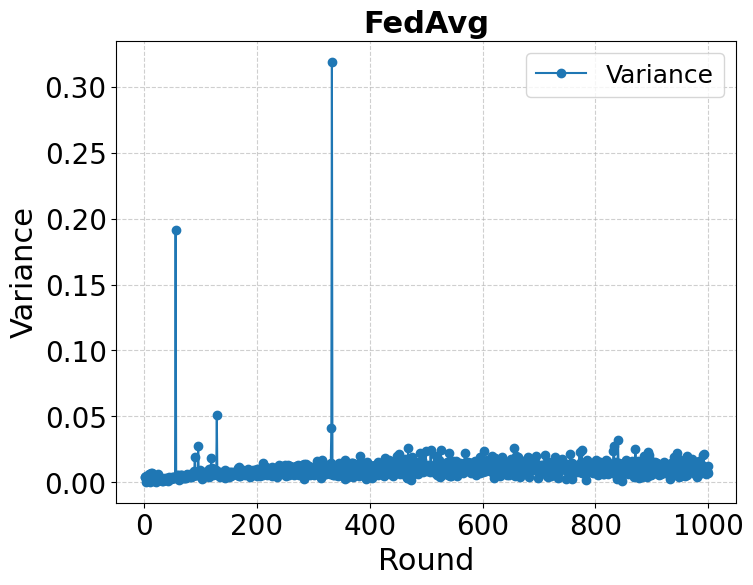

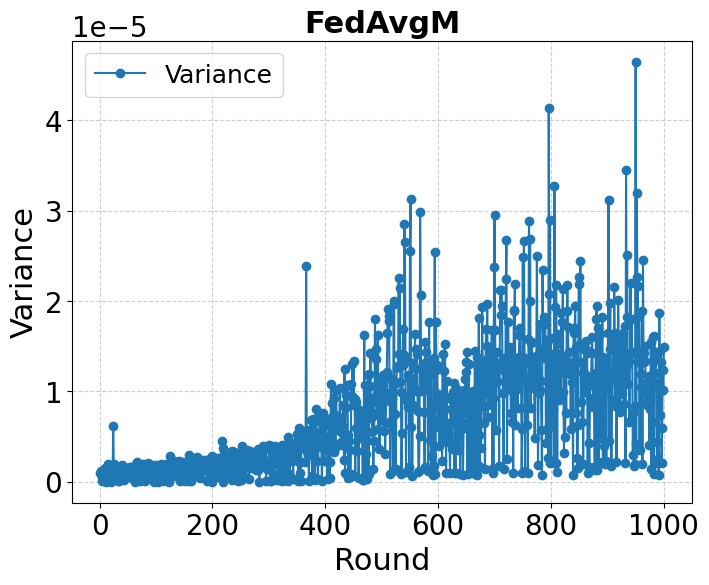

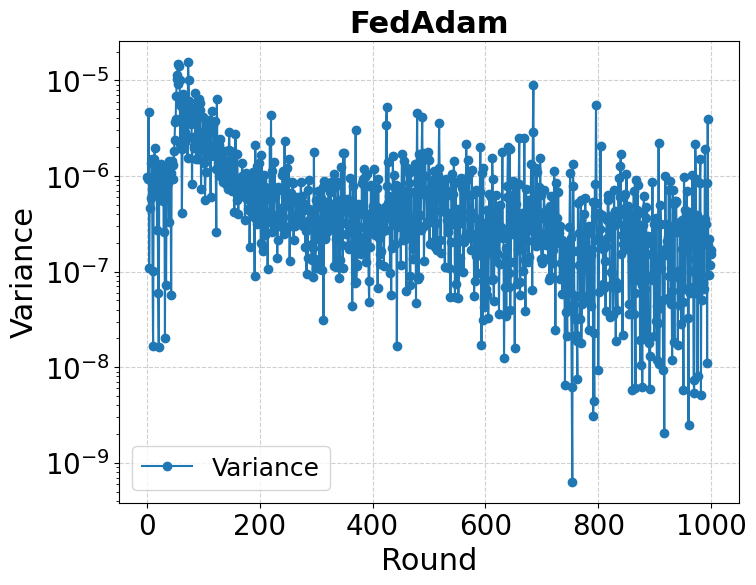

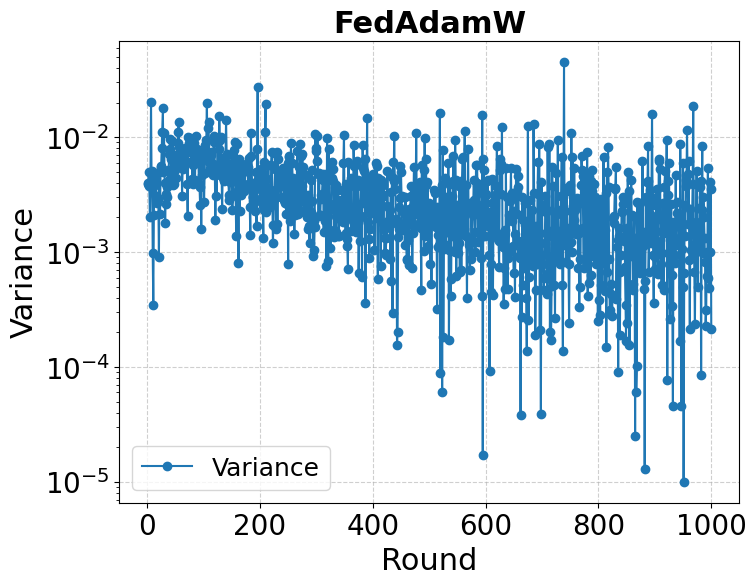

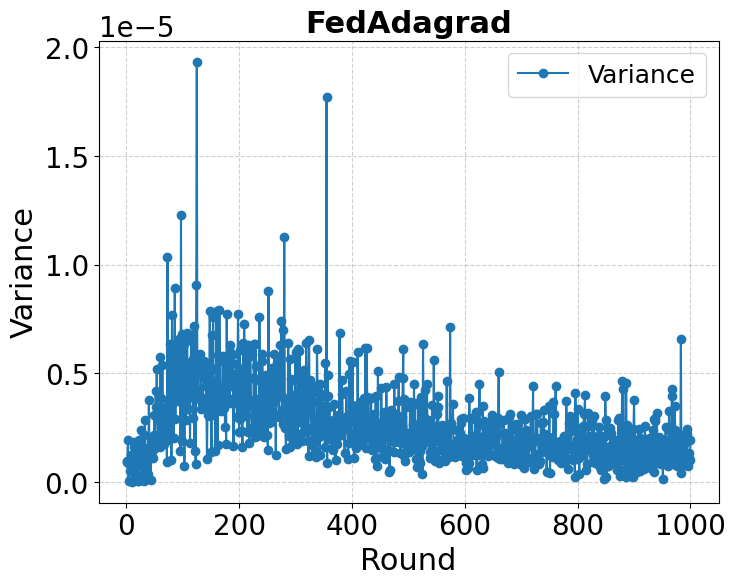

In [113]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:
    
    df_fed_alg = filter_opt(df_fed_opt, alg)
    
    df_fed_alg = df_fed_alg[df_fed_alg['local_epochs'] == 1]
    
    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('CoLa', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('CoLa', alg)]['client_opt_lr_log10'])
    ]
    
    if alg in ['FedAdam', 'FedAdamW']:
        plot_variance(df_fed_alg, True, alg)
    else:
        plot_variance(df_fed_alg, False, alg)

## FDA vs Fed-Opt

In [134]:
percentages = [0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

In [135]:
percentages = [0.85, 0.9, 0.95]

In [136]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Algorithm", *percentages]

In [137]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:

    df_fed_alg = filter_opt(df_fed_opt, alg)
    df_fda_alg = filter_opt(df_fda_opt, alg)

    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('CoLa', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('CoLa', alg)]['client_opt_lr_log10'])
    ]

    df_fda_alg = df_fda_alg[
        (df_fda_alg['server_opt_lr_log10'] == best_performing[('CoLa', alg)]['server_opt_lr_log10']) & 
        (df_fda_alg['client_opt_lr_log10'] == best_performing[('CoLa', alg)]['client_opt_lr_log10'])
    ]
    
    #print(df_fed_alg['local_epochs'].unique())
    
    #for e in sorted(df_fed_alg['local_epochs'].unique()):
    for e in [1]:
        
        fed_opt_row = [f"{alg} (e = {e})"]
        
        df_e = df_fed_alg[df_fed_alg['local_epochs'] == e]
        
        #print(len(df_fed_alg))
        
        for perc in percentages:
            matthews_correlation = perc * best_matthews_correlation
            
            def_fed_alg_best = df_e[df_e['matthews_correlation'] >= matthews_correlation]
            
            if def_fed_alg_best.empty:
                fed_opt_row.append("-")
            else:
                fed_opt_row.append(def_fed_alg_best.iloc[0]['round'])
            
        table.add_row(fed_opt_row)
        
    fda_opt_row = [fda_name(alg)]
    
    for perc in percentages:
        matthews_correlation = perc * best_matthews_correlation
                
        def_fda_alg_best = df_fda_alg[df_fda_alg['matthews_correlation'] >= matthews_correlation]
            
        if def_fda_alg_best.empty:
            fda_opt_row.append("-")
        else:
            fda_opt_row.append(def_fda_alg_best.iloc[0]['round'])
    
    table.add_row(fda_opt_row)
    
    table.add_row((len(percentages) + 1) * ['#'])

In [138]:
table

Algorithm,0.85,0.9,0.95
FedAvg (e = 1),166,203,775
FDA-SGD,35,203,559
#,#,#,#
FedAvgM (e = 1),542,602,812
FDA-SGDM,214,234,401
#,#,#,#
FedAdam (e = 1),55,67,67
FDA-Adam,-,-,-
#,#,#,#
FedAdamW (e = 1),36,77,243


# SST-2

clients = 100, per round = 10, max rounds = 200

In [139]:
best_accuracy = 94.8

In [140]:
df_fed_opt = filter_unique_test(
    df_fedopt, checkpoint='roberta-base', ds_path='glue', ds_name='sst2', alpha=1., batch_size=8, num_clients=100, clients_per_round=10, fda=False
)
df_fda_opt = filter_unique_test(
    df_fdaopt, checkpoint='roberta-base', ds_path='glue', ds_name='sst2', alpha=1., batch_size=8, num_clients=100, clients_per_round=10, fda=True
)

df_fed_opt = df_fed_opt[df_fed_opt['round'] <= 200]
df_fda_opt = df_fda_opt[df_fda_opt['round'] <= 200]

In [141]:
max(df_fed_opt['accuracy'])

95.3

In [142]:
max(df_fda_opt['accuracy'])

95.07

## Best learning rate for FedOpt

In [37]:
learning_rate_grid_max(df_fed_opt, 'FedAvgM', 'SST-2', 'Accuracy')

In [38]:
learning_rate_grid_max(df_fed_opt, 'FedAdam', 'SST-2', 'Accuracy',)

In [39]:
learning_rate_grid_max(df_fed_opt, 'FedAdamW', 'SST-2', 'Accuracy',)

In [40]:
learning_rate_grid_max(df_fed_opt, 'FedAdagrad', 'SST-2', 'Accuracy',)

In [41]:
learning_rate_grid_max(df_fed_opt, 'FedAvg', 'SST-2', 'Accuracy',)

## Variance

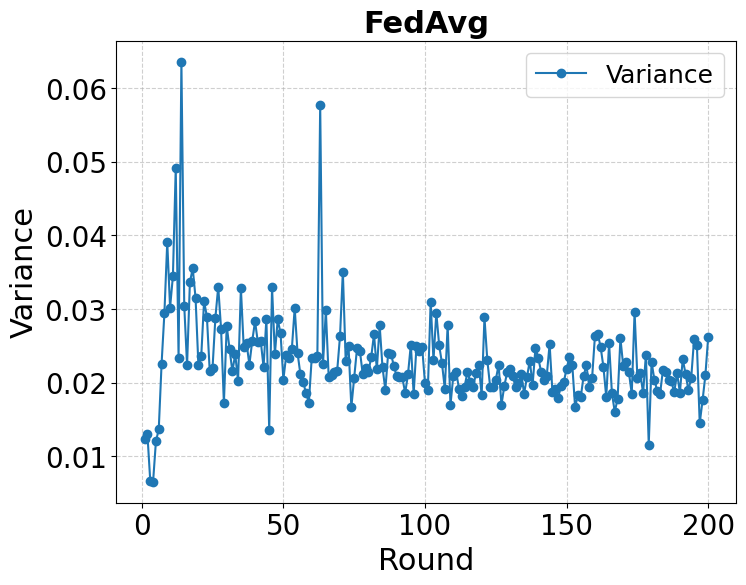

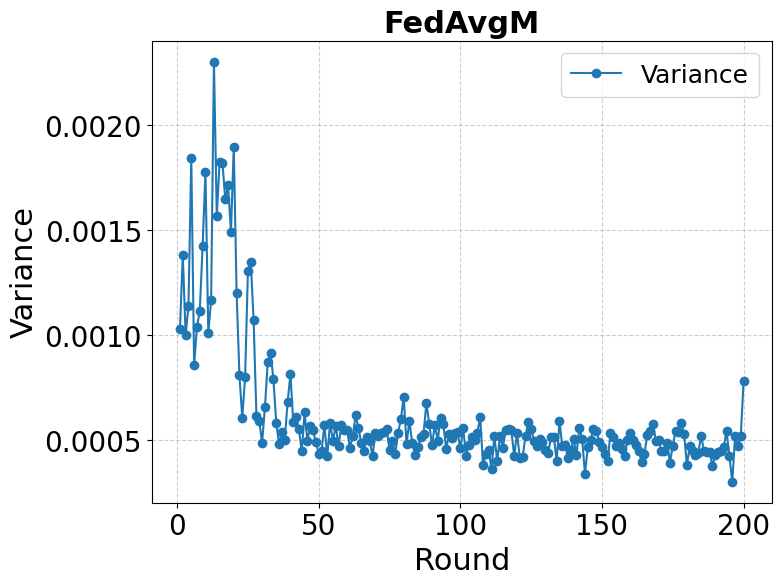

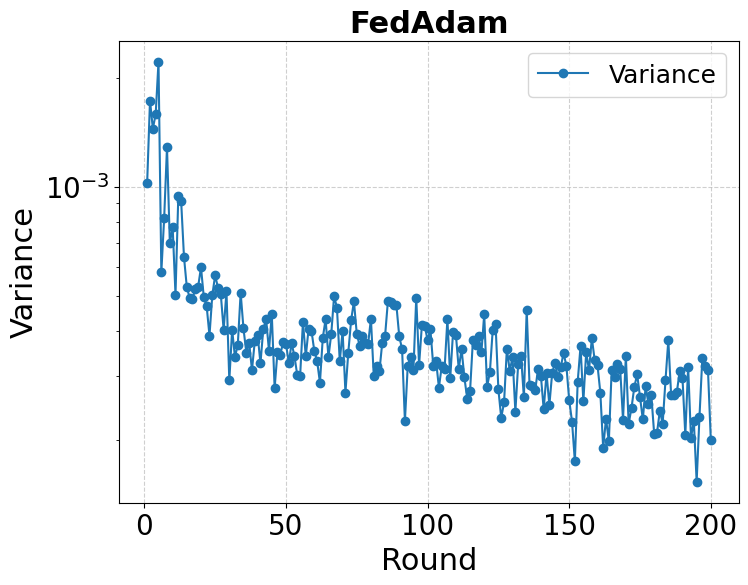

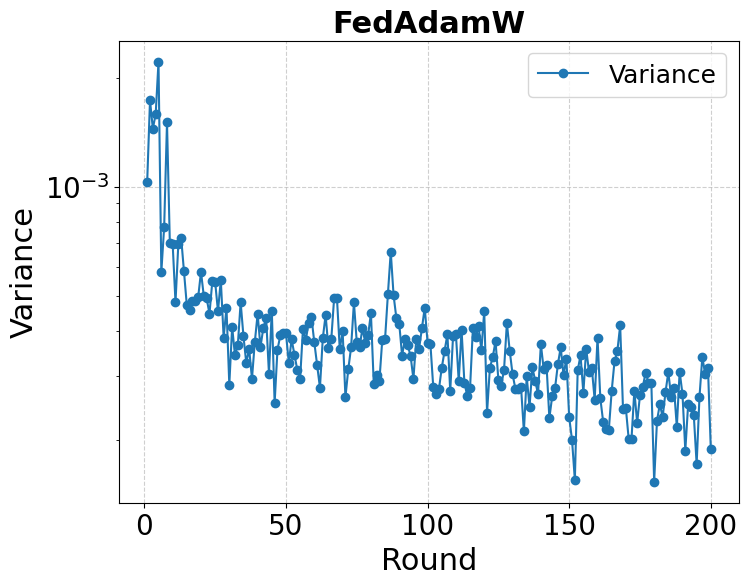

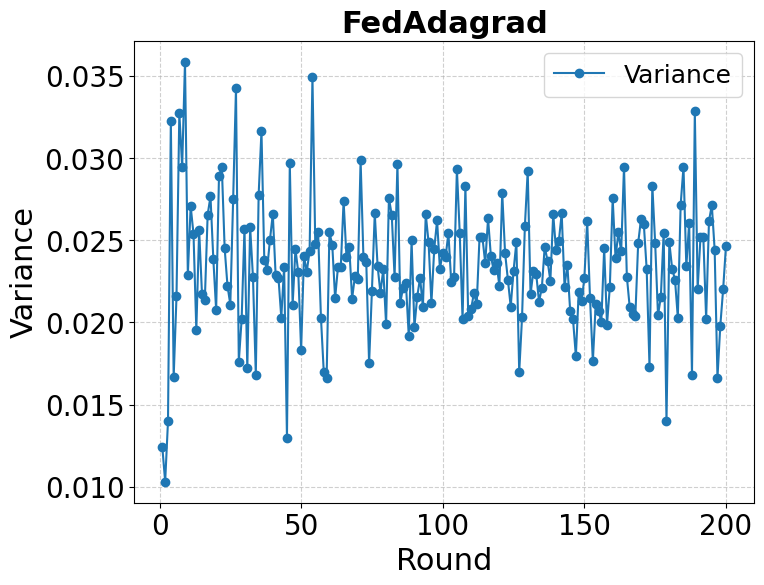

In [43]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:
    
    df_fed_alg = filter_opt(df_fed_opt, alg)
    
    df_fed_alg = df_fed_alg[df_fed_alg['local_epochs'] == 1]
    
    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('SST-2', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('SST-2', alg)]['client_opt_lr_log10'])
    ]
    
    if alg in ['FedAdam', 'FedAdamW']:
        plot_variance(df_fed_alg, True, alg)
    else:
        plot_variance(df_fed_alg, False, alg)

## FDA vs Fed-Opt

In [110]:
percentages = [0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

In [147]:
percentages = [0.9, 0.95, 0.99]

In [148]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Algorithm", *percentages]

In [149]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:

    df_fed_alg = filter_opt(df_fed_opt, alg)
    df_fda_alg = filter_opt(df_fda_opt, alg)

    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('SST-2', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('SST-2', alg)]['client_opt_lr_log10'])
    ]

    df_fda_alg = df_fda_alg[
        (df_fda_alg['server_opt_lr_log10'] == best_performing[('SST-2', alg)]['server_opt_lr_log10']) & 
        (df_fda_alg['client_opt_lr_log10'] == best_performing[('SST-2', alg)]['client_opt_lr_log10'])
    ]
    
    #print(df_fed_alg['local_epochs'].unique())
    
    #for e in sorted(df_fed_alg['local_epochs'].unique()):
    for e in [1]:
        
        fed_opt_row = [f"{alg} (e = {e})"]
        
        df_e = df_fed_alg[df_fed_alg['local_epochs'] == e]
        
        #print(len(df_fed_alg))
        
        for perc in percentages:
            accuracy = perc * best_accuracy
            
            def_fed_alg_best = df_e[df_e['accuracy'] >= accuracy]
            
            if def_fed_alg_best.empty:
                fed_opt_row.append("-")
            else:
                fed_opt_row.append(def_fed_alg_best.iloc[0]['round'])
            
        table.add_row(fed_opt_row)
        
    fda_opt_row = [fda_name(alg)]
    
    for perc in percentages:
        accuracy = perc * best_accuracy
                
        def_fda_alg_best = df_fda_alg[df_fda_alg['accuracy'] >= accuracy]
            
        if def_fda_alg_best.empty:
            fda_opt_row.append("-")
        else:
            fda_opt_row.append(def_fda_alg_best.iloc[0]['round'])
    
    table.add_row(fda_opt_row)
    
    table.add_row((len(percentages) + 1) * ['#'])

In [150]:
table

Algorithm,0.9,0.95,0.99
FedAvg (e = 1),8,8,93
FDA-SGD,3,7,43
#,#,#,#
FedAvgM (e = 1),23,30,91
FDA-SGDM,8,12,41
#,#,#,#
FedAdam (e = 1),7,12,42
FDA-Adam,4,8,25
#,#,#,#
FedAdamW (e = 1),7,12,35


# QNLI

clients = 250, per round = 10, max rounds = 200

In [152]:
best_accuracy = 92.8

In [153]:
df_fed_opt = filter_unique_test(
    df_fedopt, checkpoint='roberta-base', ds_path='glue', ds_name='qnli', alpha=1., batch_size=8, num_clients=250, clients_per_round=10, fda=False
)
df_fda_opt = filter_unique_test(
    df_fdaopt, checkpoint='roberta-base', ds_path='glue', ds_name='qnli', alpha=1., batch_size=8, num_clients=250, clients_per_round=10, fda=True
)

df_fed_opt = df_fed_opt[df_fed_opt['round'] <= 200]
df_fda_opt = df_fda_opt[df_fda_opt['round'] <= 200]

In [154]:
max(df_fed_opt['accuracy'])

92.17999999999999

In [155]:
max(df_fda_opt['accuracy'])

91.95

## Best learning rate for FedOpt

In [33]:
learning_rate_grid_max(df_fed_opt, 'FedAvgM', 'QNLI', 'Accuracy')

In [34]:
learning_rate_grid_max(df_fed_opt, 'FedAdam', 'QNLI', 'Accuracy',)

In [35]:
learning_rate_grid_max(df_fed_opt, 'FedAdamW', 'QNLI', 'Accuracy',)

In [36]:
learning_rate_grid_max(df_fed_opt, 'FedAdagrad', 'QNLI', 'Accuracy',)

In [37]:
learning_rate_grid_max(df_fed_opt, 'FedAvg', 'QNLI', 'Accuracy',)

## Variance

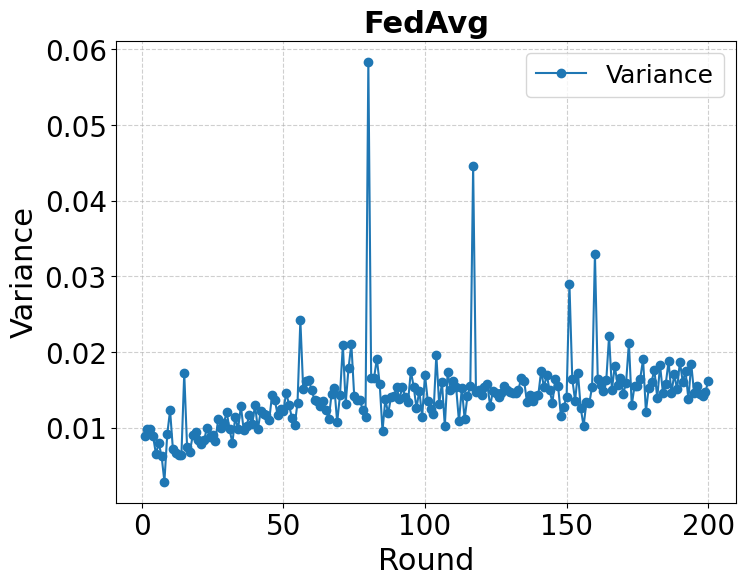

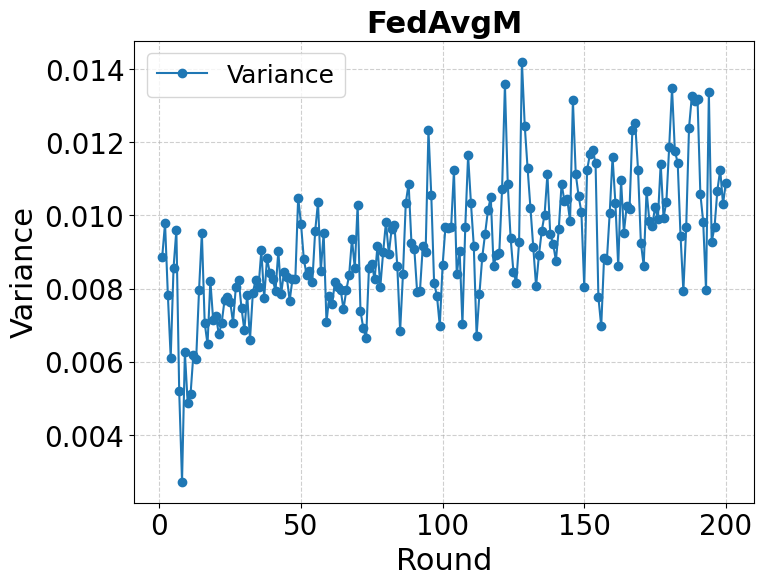

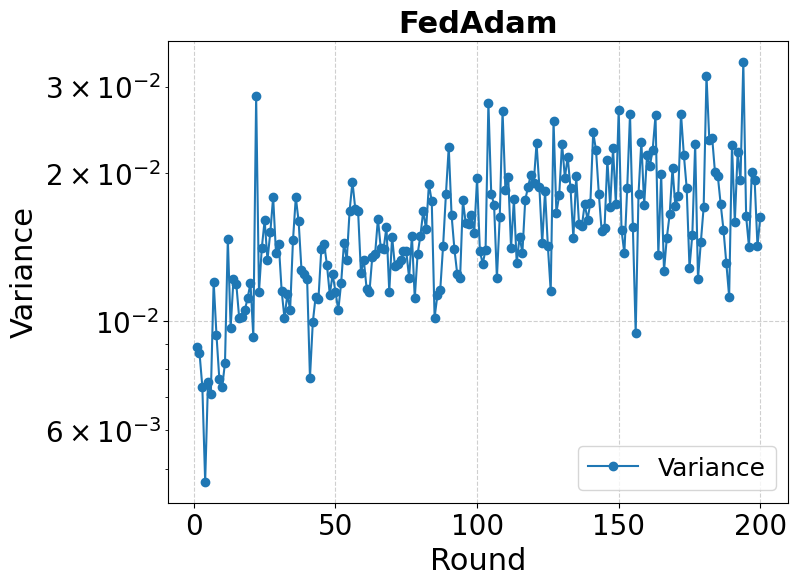

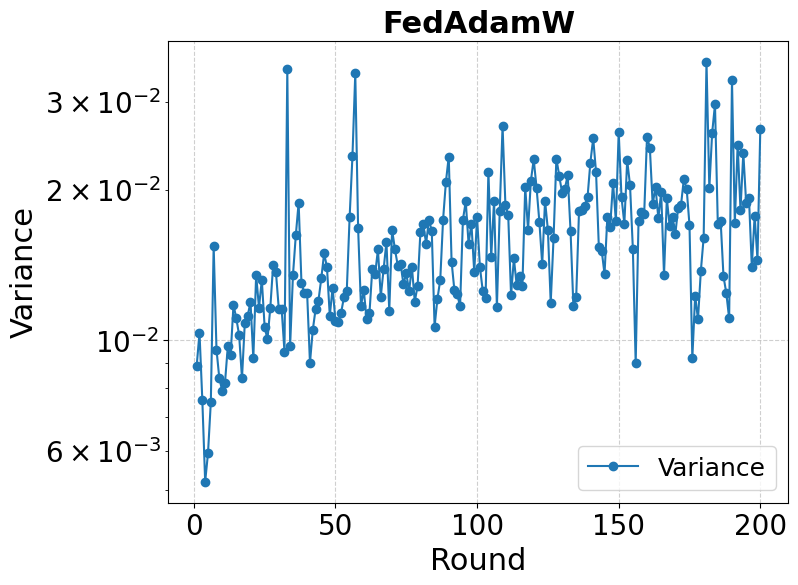

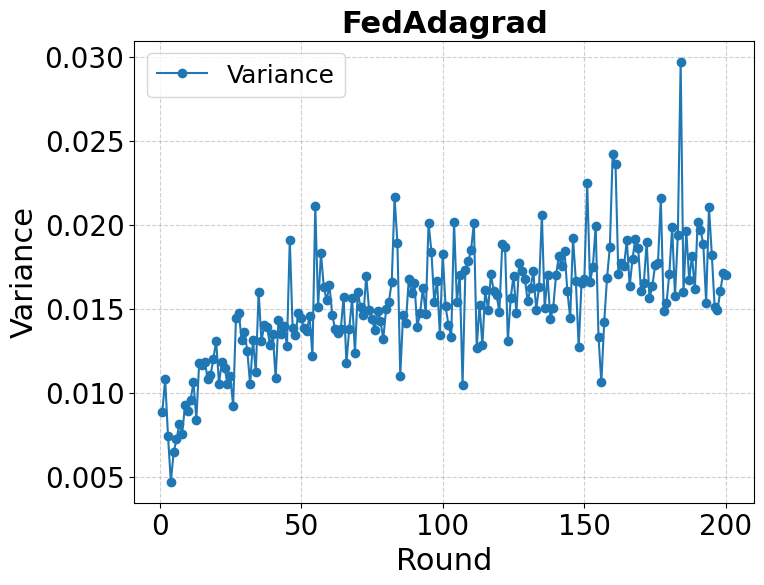

In [156]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:
    
    df_fed_alg = filter_opt(df_fed_opt, alg)
    
    df_fed_alg = df_fed_alg[df_fed_alg['local_epochs'] == 1]
    
    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('QNLI', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('QNLI', alg)]['client_opt_lr_log10'])
    ]
    
    if alg in ['FedAdam', 'FedAdamW']:
        plot_variance(df_fed_alg, True, alg)
    else:
        plot_variance(df_fed_alg, False, alg)

## FDA vs Fed-Opt

In [161]:
percentages = [0.8, 0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]

In [165]:
percentages = [0.85, 0.9, 0.95]

In [166]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Algorithm", *percentages]

In [167]:
for alg in ['FedAvg', 'FedAvgM', 'FedAdam', 'FedAdamW', 'FedAdagrad']:

    df_fed_alg = filter_opt(df_fed_opt, alg)
    df_fda_alg = filter_opt(df_fda_opt, alg)

    df_fed_alg = df_fed_alg[
        (df_fed_alg['server_opt_lr_log10'] == best_performing[('QNLI', alg)]['server_opt_lr_log10']) & 
        (df_fed_alg['client_opt_lr_log10'] == best_performing[('QNLI', alg)]['client_opt_lr_log10'])
    ]

    df_fda_alg = df_fda_alg[
        (df_fda_alg['server_opt_lr_log10'] == best_performing[('QNLI', alg)]['server_opt_lr_log10']) & 
        (df_fda_alg['client_opt_lr_log10'] == best_performing[('QNLI', alg)]['client_opt_lr_log10'])
    ]
    
    #print(df_fed_alg['local_epochs'].unique())
    
    for e in sorted(df_fed_alg['local_epochs'].unique()):
        
        fed_opt_row = [f"{alg} (e = {e})"]
        
        df_e = df_fed_alg[df_fed_alg['local_epochs'] == e]
        
        #print(len(df_fed_alg))
        
        for perc in percentages:
            accuracy = perc * best_accuracy
            
            def_fed_alg_best = df_e[df_e['accuracy'] >= accuracy]
            
            if def_fed_alg_best.empty:
                fed_opt_row.append("-")
            else:
                fed_opt_row.append(def_fed_alg_best.iloc[0]['round'])
            
        table.add_row(fed_opt_row)
        
    fda_opt_row = [fda_name(alg)]
    
    for perc in percentages:
        accuracy = perc * best_accuracy
                
        def_fda_alg_best = df_fda_alg[df_fda_alg['accuracy'] >= accuracy]
            
        if def_fda_alg_best.empty:
            fda_opt_row.append("-")
        else:
            fda_opt_row.append(def_fda_alg_best.iloc[0]['round'])
    
    table.add_row(fda_opt_row)
    
    table.add_row((len(percentages) + 1) * ['#'])

In [168]:
table

Algorithm,0.85,0.9,0.95
FedAvg (e = 1),15,35,71
FDA-SGD,4,9,23
#,#,#,#
FedAvgM (e = 1),16,38,81
FDA-SGDM,6,11,44
#,#,#,#
FedAdam (e = 1),6,11,22
FDA-Adam,5,6,22
#,#,#,#
FedAdamW (e = 1),6,11,22
